# Afficher les champions les plus joués à un poste et leur winrate 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df = pd.read_csv("../Création du Dataset/datasetv3.csv")
print(df.head())

        Unnamed: 0      Y TOP0_CHAMP  TOP0_LVL  TOP0_TOTAL  TOP0_GWR  \
0  EUW1_6140228604  False     KSante       481         237  0.506329   
1  EUW1_6141546191  False       Sett       323          27  0.407407   
2  EUW1_6140416681  False      Akali       342          22  0.500000   
3  EUW1_6139592219  False    Warwick        42          68  0.544118   
4  EUW1_6045620377   True     Aatrox       307         215  0.511628   

   TOP0_VET              TOP0_RANK  TOP0_HOT         TOP0_KDAG  ... TOP0_MAS  \
0     False  ['PLATINUM', 'II', 0]     False   [7.2, 5.8, 3.6]  ...      975   
1     False     ['GOLD', 'IV', 71]     False   [6.6, 5.2, 4.8]  ...    91624   
2     False    ['SILVER', 'I', 22]     False  [3.6, 4.0, 13.2]  ...   176711   
3     False      ['GOLD', 'I', 30]     False   [5.8, 6.8, 4.0]  ...     6799   
4     False  ['PLATINUM', 'IV', 0]     False   [6.4, 3.6, 5.8]  ...    15788   

   TOP1_MAS  JGL0_MAS  JGL1_MAS MID0_MAS  MID1_MAS  ADC0_MAS  ADC1_MAS  \
0    376840 

Index(['Graves', 'Kayn', 'Hecarim', 'Viego', 'LeeSin'], dtype='object')
[0.5031055900621118, 0.47096774193548385, 0.46853146853146854, 0.4461538461538462, 0.5309734513274337]


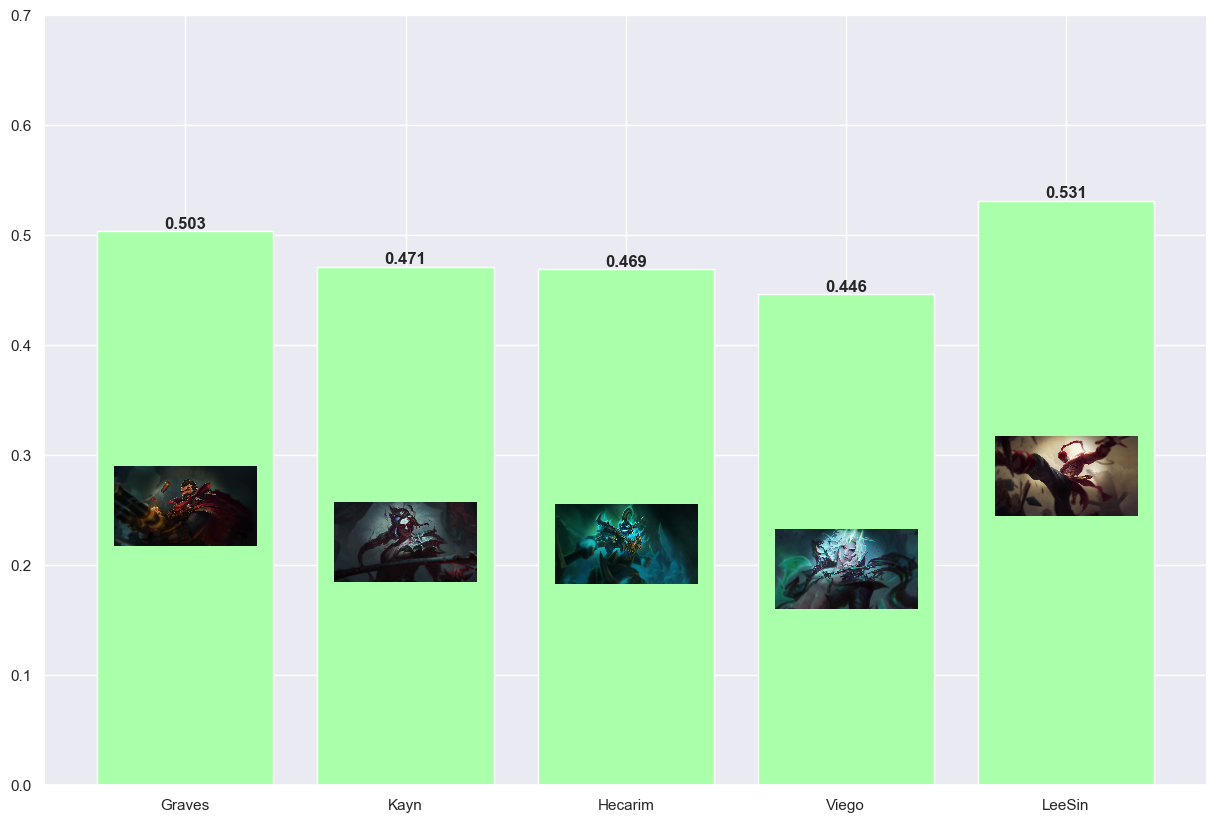

In [41]:
#Trouver les 5 champions les plus joués et afficher leur winrate avec un graphique matplotlib

#On récupère les 5 champions les plus joués
champions = df["JGL0_CHAMP"].value_counts().index[:5]
print(champions)

#On récupère les winrates de ces champions
winrates = []
for champion in champions:
    winrates.append(df[df["JGL0_CHAMP"]==champion]["Y"].mean())
print(winrates)


#On met l'image correspondant à chaque champion au dessus de chaque barre

#On récupère les images
images = []
for champion in champions:
    images.append(plt.imread(f"/Users/felixdoublet/Desktop/Cours_CN/Info_IA/Projet Gaming/dragontail-12.6.1/img/champion/centered/{champion}_0.jpg")) #A voir comment gerer les images autrement 

sns.set()
fig, ax = plt.subplots()
#Agrandir le graphique
fig.set_size_inches(15, 10)

#Colorer les barres avec des couleurs pales 
ax.bar(champions,winrates,color=["#AAFFAA","#AAFFAA","#AAFFAA","#AAFFAA","#AAFFAA"])        
for i in range(len(champions)):
    imagebox = OffsetImage(images[i], zoom=0.080)
    ab = AnnotationBbox(imagebox, (champions[i], winrates[i]-0.25), frameon=False)
    ax.add_artist(ab)
    plt.text(i, winrates[i], round(winrates[i],3), ha='center', va='bottom', fontweight='bold')
plt.ylim(0,0.7)
plt.show()


# Pour un match, afficher l'expérience de chaque joueur sur le champion

[271, 81, 518, 370, 95, 371, 695, 88, 546, 283]


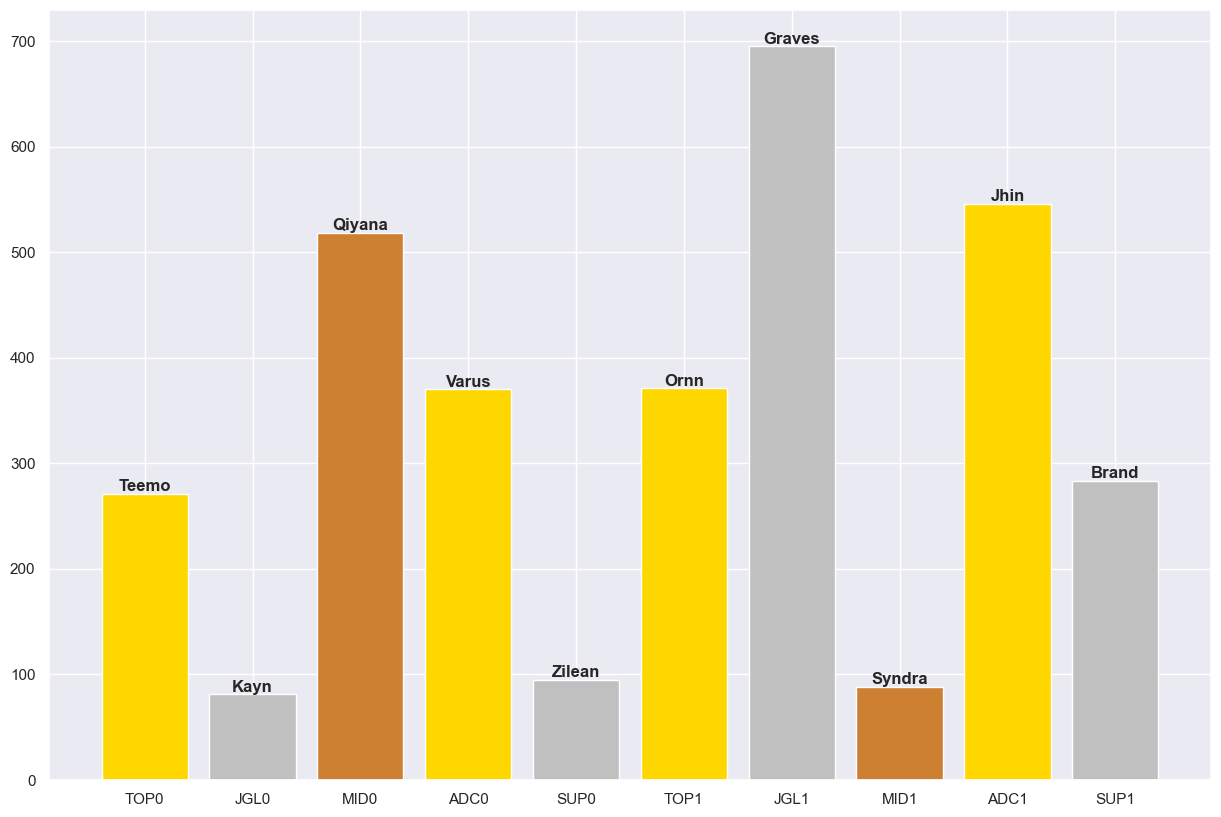

In [9]:
# On prend une game aléatoire
game = df.sample(1)

Liste_postes=["TOP0","JGL0","MID0","ADC0","SUP0","TOP1","JGL1","MID1","ADC1","SUP1"]

#Récupérer le niveau d'invocateur de cahque joueur
nv = []
for poste in Liste_postes:
    nv.append(game[poste+"_LVL"].values[0])
print(nv)

#Récupérer les noms des champions
champions = []
for x in Liste_postes:
    champions.append(game[x+"_CHAMP"].values[0])

#Afficher les barres   avec les niveaux et le nom des champions
sns.set()
fig, ax = plt.subplots()
#Agrandir le graphique
fig.set_size_inches(15, 10)
ax.bar(Liste_postes,nv,color=["#FFD700","#C0C0C0","#CD7F32","#FFD700","#C0C0C0","#FFD700","#C0C0C0","#CD7F32","#FFD700","#C0C0C0"])
for i in range(len(Liste_postes)):
    plt.text(i, nv[i], champions[i], ha='center', va='bottom', fontweight='bold')
plt.show()






# Pour un match, afficher le nombre de kills de chaque joueur sur le champion

[8, 6, 4, 7, 1, 5, 7, 4, 3, 2]


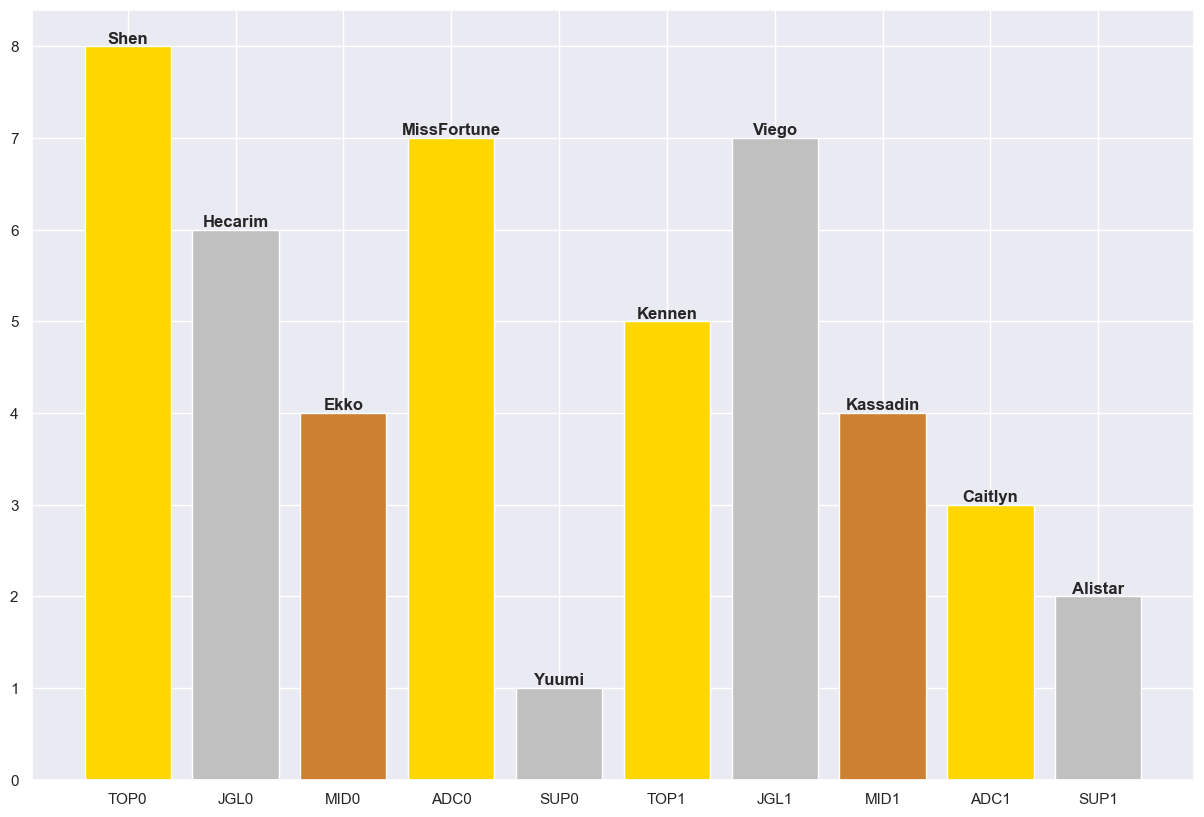

In [26]:
# For a singla game, plot the number of kills for each player
# On prend une game aléatoire
game = df.sample(1)

Liste_postes=["TOP0","JGL0","MID0","ADC0","SUP0","TOP1","JGL1","MID1","ADC1","SUP1"]

#Récupérer le nombre de kills de chaque joueur
kills = []
for poste in Liste_postes:
    kills.append(int(game[poste+"_KDAG"].values[0][1]))
print(kills)


#Récupérer les noms des champions
champions = []
for x in Liste_postes:
    champions.append(game[x+"_CHAMP"].values[0])

#Afficher les barres   avec les niveaux et le nom des champions

fig, ax = plt.subplots()
#Agrandir le graphique
fig.set_size_inches(15, 10)
ax.bar(Liste_postes,kills,color=["#FFD700","#C0C0C0","#CD7F32","#FFD700","#C0C0C0","#FFD700","#C0C0C0","#CD7F32","#FFD700","#C0C0C0"])
for i in range(len(Liste_postes)):
    plt.text(i, kills[i], champions[i], ha='center', va='bottom', fontweight='bold')
plt.show()

# Calcul quelques stats sur les parties du dataset

Nombre de parties

In [31]:
df.shape

(2887, 142)

Rangs majoritaires des games

In [33]:
#Top 5 rank of games
list_rank = []
for role in ["TOP","JGL","MID","ADC","SUP"]:
    list_rank.append(df[role+"0_RANK"])
    list_rank.append(df[role+"1_RANK"])

#On récupère les 5 ranks les plus joués
ranks = pd.concat(list_rank).value_counts().index[:5]
print(ranks)


Index(['['PLATINUM', 'IV', 0]', '['PLATINUM', 'III', 0]',
       '['PLATINUM', 'II', 0]', '['PLATINUM', 'III', 75]',
       '['PLATINUM', 'IV', 75]'],
      dtype='object')


Winrate blue team / red team

In [42]:
df["Y"].mean()

0.5019050917907862